# Bibliotecas

Coleção utilizada para manipular, tratar e analisar dados e treinar e avaliar os modelos.

In [21]:
# Manipulação, limpeza e análise estatística dos dados
import pandas as pd
import numpy as np

# Plot de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Treinamento dos modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Integrantes

In [3]:
members = {
    'RM': ['552226', '98676', '551905', '550782'],
    'Nome': ['Bruno Francisco Brito de Paula', 'Edward de Lima Silva',
             'Gabriel Barroso de Assis França','Kayque Lima Nunes'],
}
group = pd.DataFrame(members)
group.set_index('RM', inplace=True)
group['Turma'] = '2TDSPW'
group

,Nome,Turma
RM,,
552226,Bruno Francisco Brito de Paula,2TDSPW
98676,Edward de Lima Silva,2TDSPW
551905,Gabriel Barroso de Assis França,2TDSPW
550782,Kayque Lima Nunes,2TDSPW


# Telco Customer Churn Dataset

Disponível em: https://www.kaggle.com/datasets/blastchar/telco-customer-churn.

Este dataset contém dados de clientes de uma empresa de telecomunicação, serviços comprados e cancelamentos.

### Colunas
Principais colunas do dataset.


CustomerID: ID do cliente;

Gender: gênero do cliente;

Senior citizien: se o cliente é idoso;

Partner: se o cliente possui parceiro;

Dependents: se o cliente possui dependentes;

Tenure: número de meses em que o cliente permaneceu com a empresa;

Phone Service: se o cliente utilizou serviço de telefone;

Multiple Lines: se o cliente possui mais de uma linha telefônica;

Internet Service: se o cliente assinou serviço de internet;

Online Security: se o cliente assinou o serviço de segurança online;


# Apresentação

Características do dataset.

In [4]:
churn = pd.read_csv('/content/Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Descrição dos campos númericos
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Características das colunas
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Não existe a necessidade de tratar dados nulos. Mas pode haver a necessidade de tratar dados vazios.

# Limpeza dos Dados

In [7]:
churn_modified = churn

# Transformando colunas com números em númericas
for column in churn_modified:
  churn_modified[column] = pd.to_numeric(churn_modified[column], errors='coerce')

churn_modified.isnull().sum()

customerID          7043
gender              7043
SeniorCitizen          0
Partner             7043
Dependents          7043
tenure                 0
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges         0
TotalCharges          11
Churn               7043
dtype: int64

Alguns valores da coluna 'TotalCharges' não puderam ser convertidos - provavelmente por estarem vazios com espaços em branco ou com caracteres misturados.

In [8]:
# Rodar read CSV dnv
churn = pd.read_csv('/content/Churn.csv')

churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn.dropna(inplace=True)
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Análise Estatística Exploratória

Explorando a correlação das variáveis, distribuição e descobrindo insights.

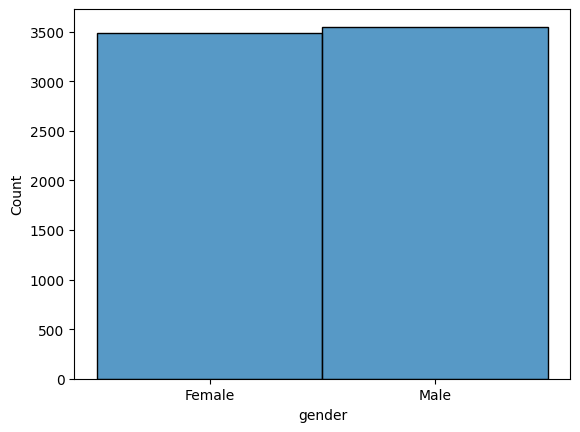

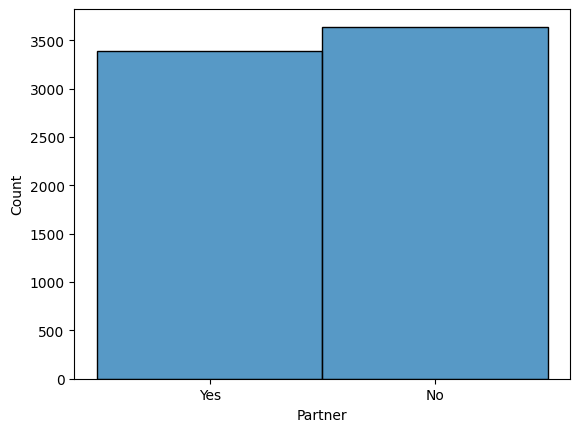

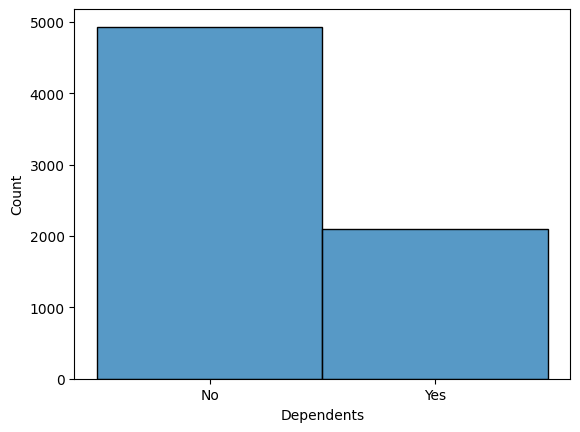

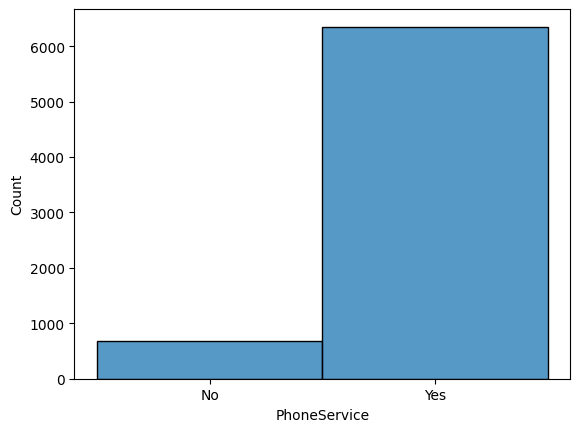

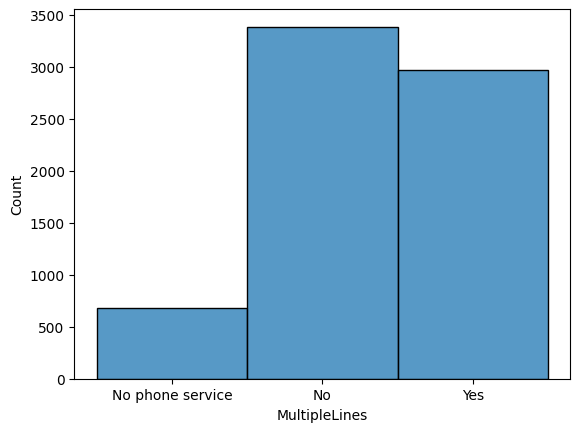

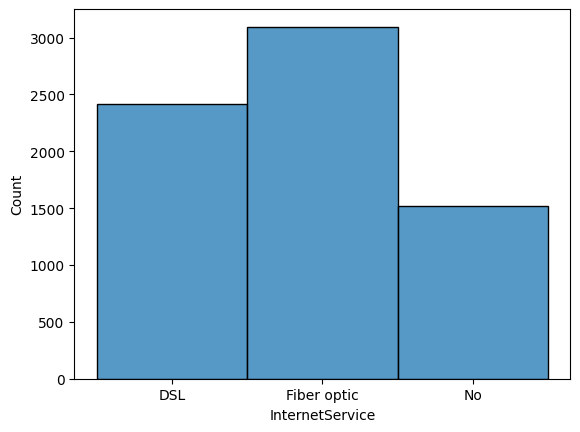

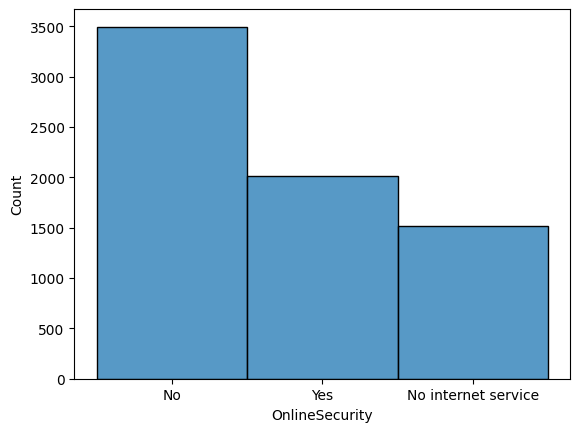

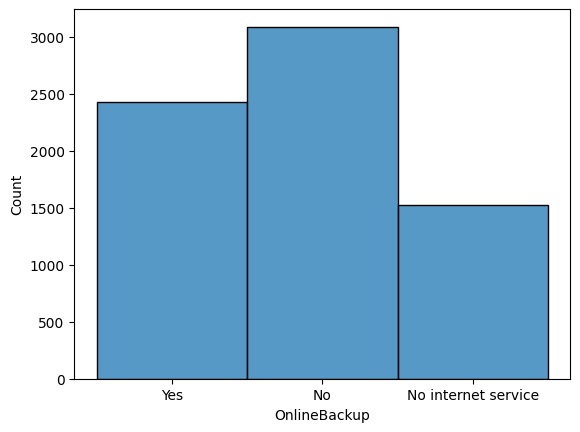

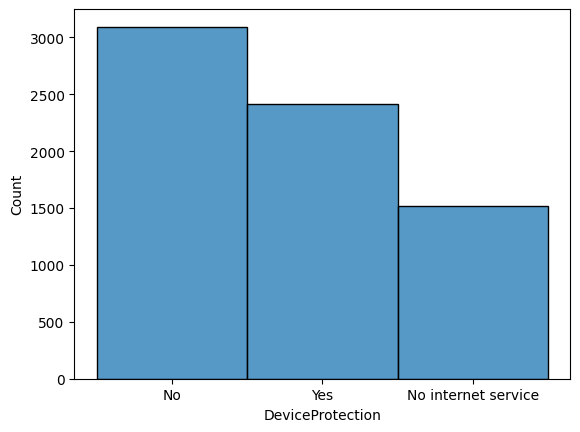

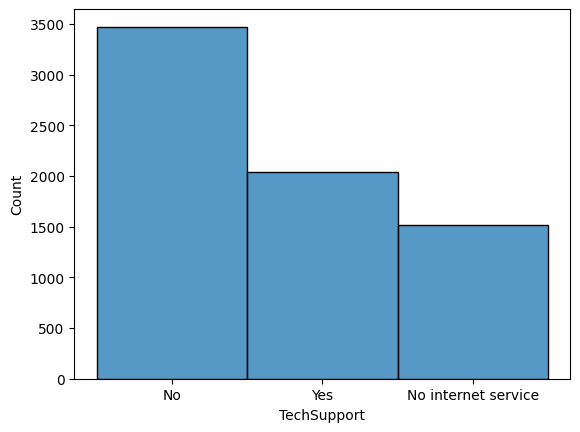

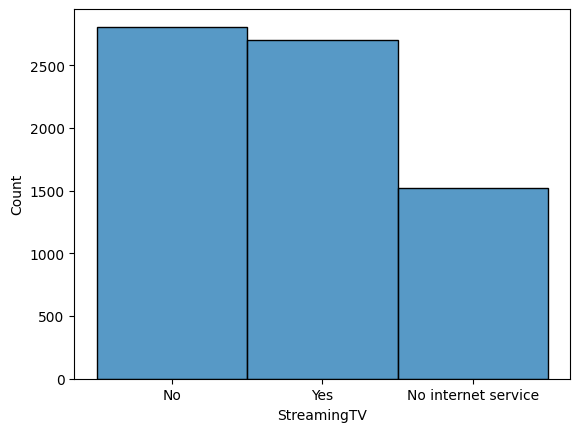

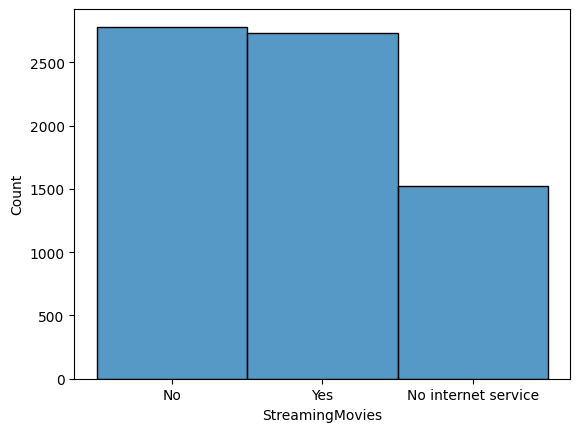

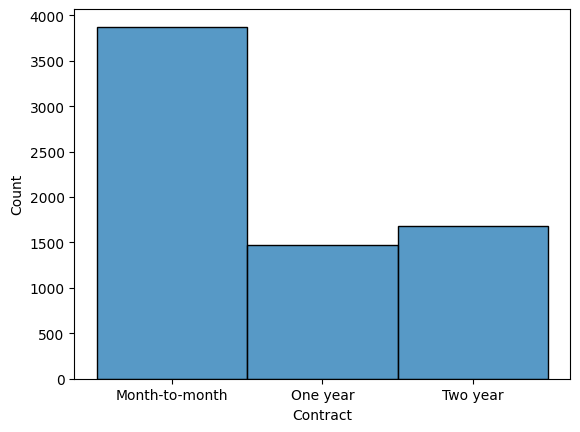

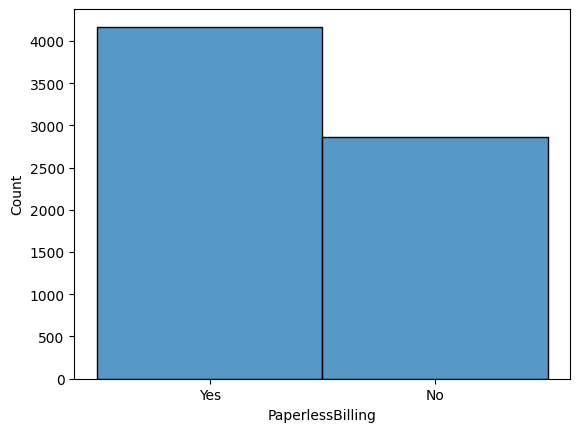

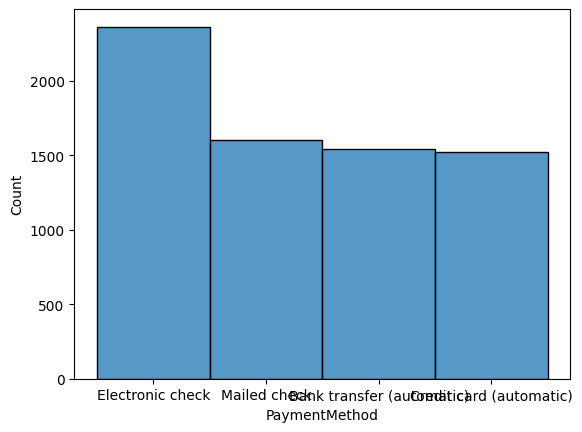

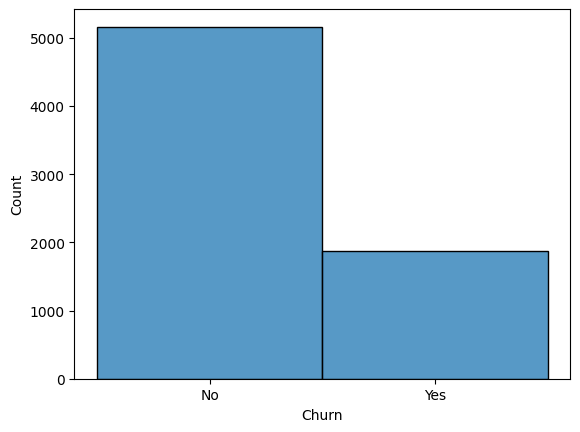

In [9]:
# prompt: create an histogram for each categorical column with two to five unique values in the dataset churn

import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns with 2 to 5 unique values
cat_cols = churn.select_dtypes(include='object').columns[churn.select_dtypes(include='object').nunique().between(2, 5)]

# Create histograms for each categorical column
for col in cat_cols:
    sns.histplot(data=churn, x=col)
    plt.show()

A maioria das pessoas optou por assinar pacotes de simples de telefonia, televisão e streaming. O público é bem divivido entre masculino e feminino além de em sua grande maioria não possuir dependentes.

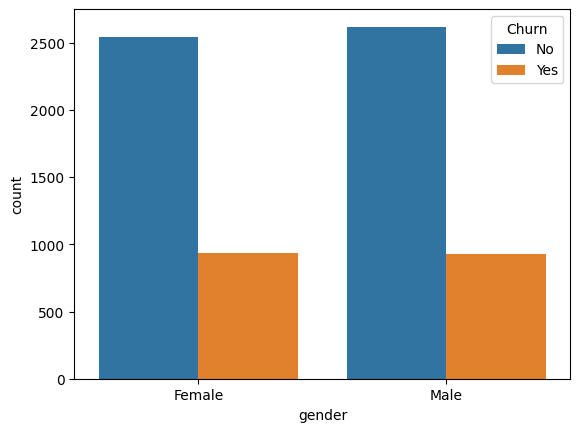

In [10]:
# prompt: now create a graphic with gender and churn correlation

import matplotlib.pyplot as plt
sns.countplot(data=churn, x='gender', hue='Churn')
plt.show()


O genêro não parece ter grande impacto na experiência do serviço.

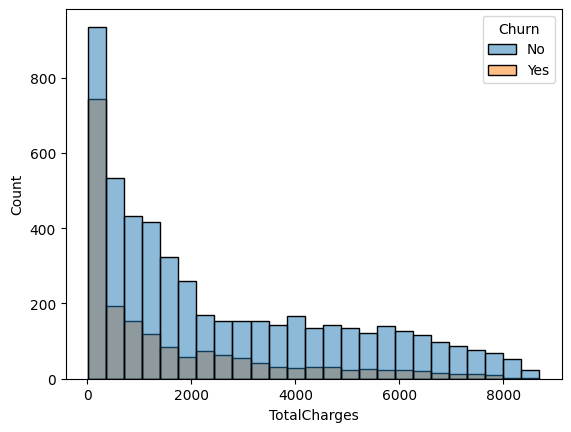

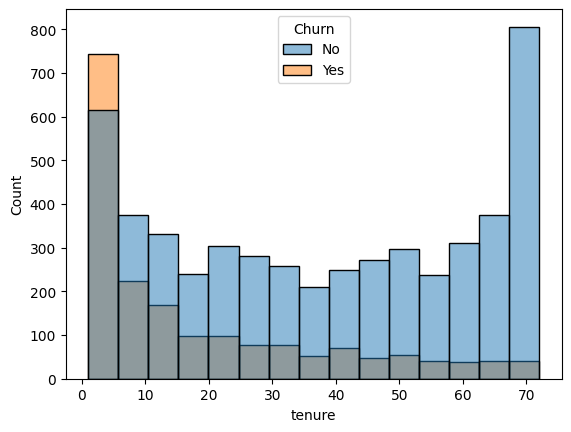

In [11]:
# prompt: do the same but with totalcharges and tenure

sns.histplot(data=churn, x='TotalCharges', hue='Churn')
plt.show()

sns.histplot(data=churn, x='tenure', hue='Churn')
plt.show()


A maioria dos clientes que não voltam a assinar o serviço são clientes novos que têm pouco tempo de teste (um a dois meses).

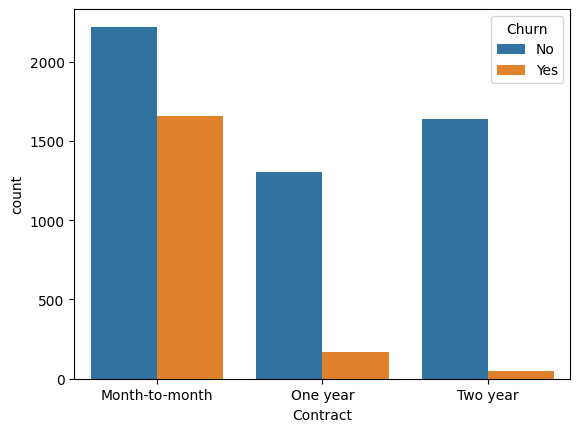

In [12]:
# prompt: same but with contract

import matplotlib.pyplot as plt
sns.countplot(data=churn, x='Contract', hue='Churn')
plt.show()


Clientes que optam por planos longos são mais fieis, e a fidelidade cresce com o passar do tempo.

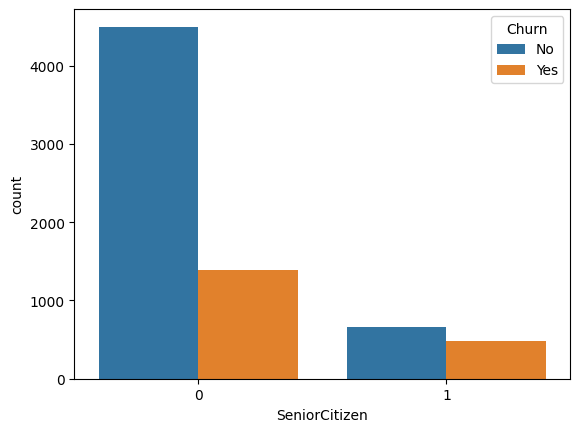

In [13]:
# prompt: churn and senior citizen graphic plot

import matplotlib.pyplot as plt
sns.countplot(data=churn, x='SeniorCitizen', hue='Churn')
plt.show()


Clientes idosos tendem a permanecer com o serviço.

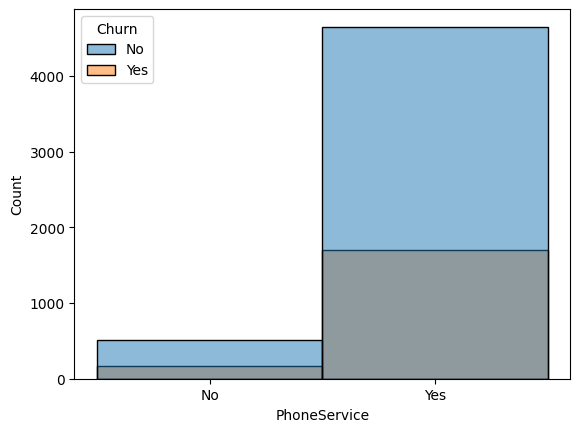

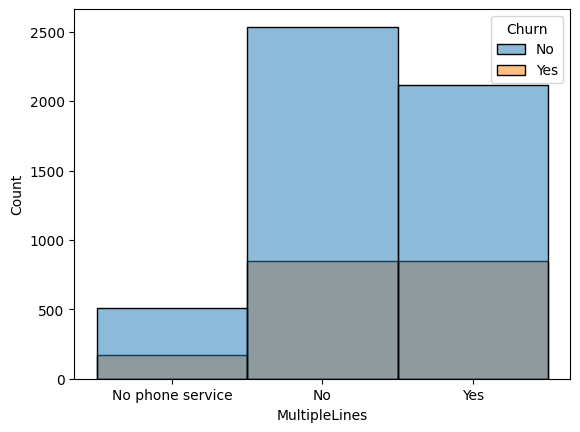

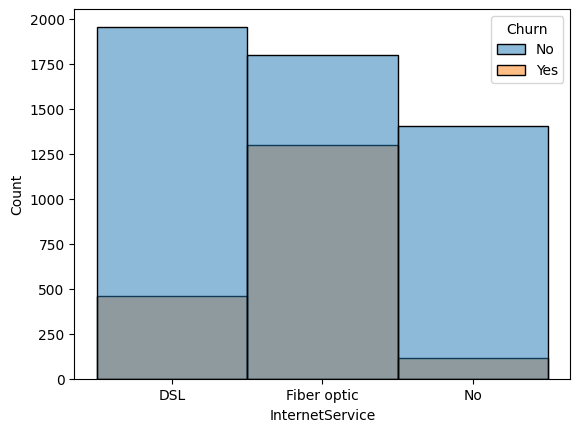

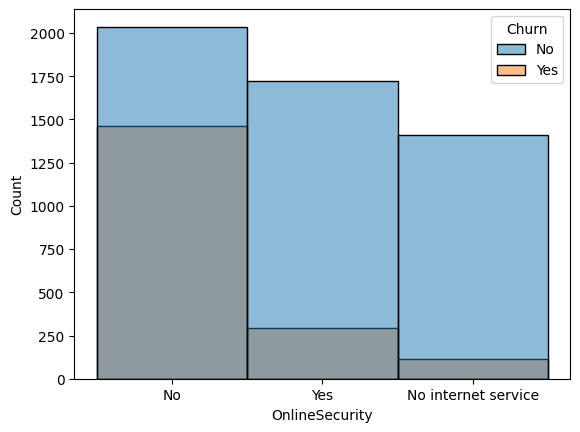

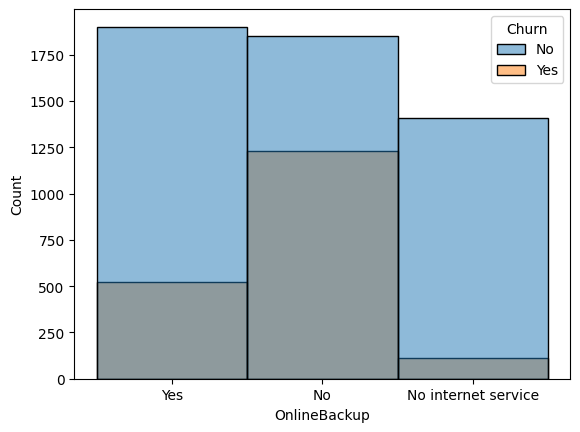

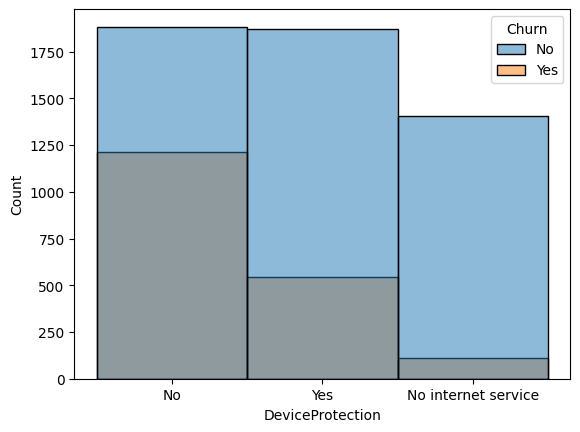

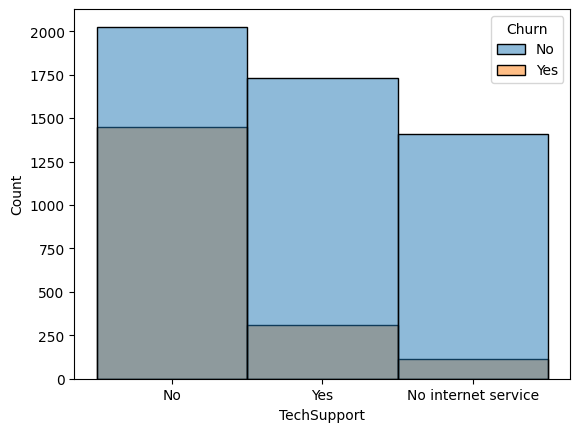

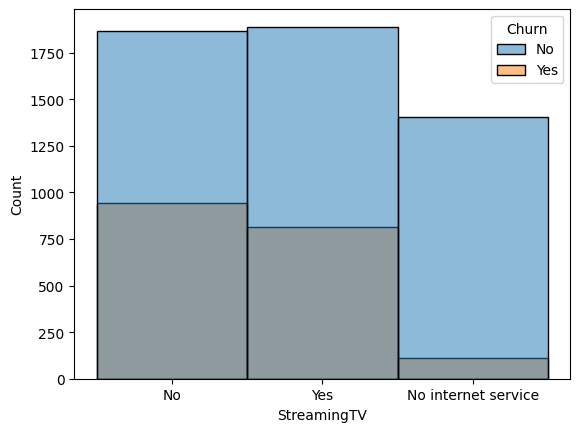

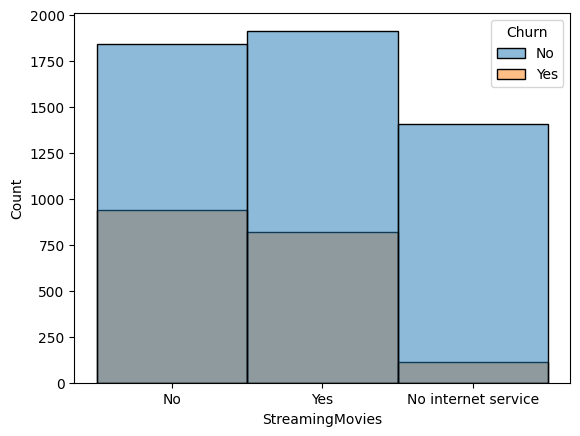

In [14]:
# prompt: do same but with every service available

# Create histograms for every service available
for col in ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    sns.histplot(data=churn, x=col, hue='Churn')
    plt.show()


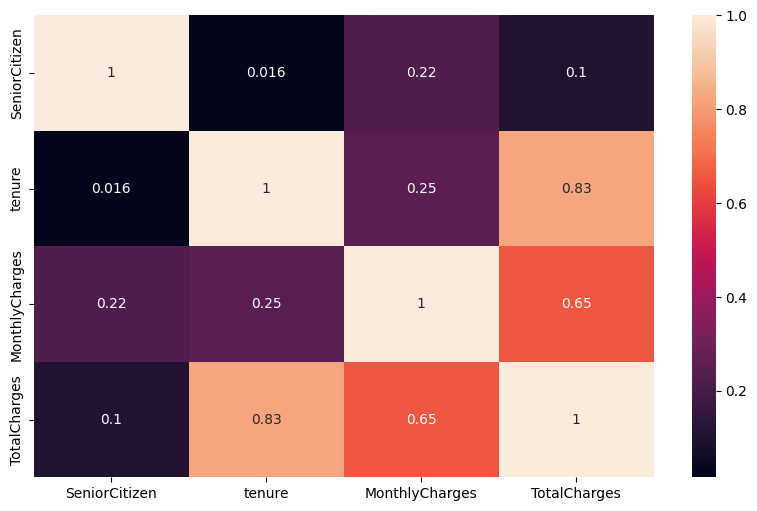

In [15]:
# prompt: now create a heatmap with the numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
numeric_df = churn.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

## Preparação dos Dados

Entradas e saídas para o treinamento do modelo.

In [16]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# prompt: iterate through the columns, and if a column is categorical or an object, apply label encoder on it

le = LabelEncoder()

for column in churn.columns:
  if churn[column].dtype == 'object' or churn[column].dtype == 'category':
    churn[column] = le.fit_transform(churn[column])

churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [18]:
churn.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006235,-0.002368,-0.026509,-0.011871,0.007209,-0.006987,0.004497,-0.012335,0.013740,...,-0.006726,0.001763,-0.007650,-0.017207,0.015949,-0.002225,0.011754,-0.004445,-0.000263,-0.017858
gender,0.006235,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,...,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.002368,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,...,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.026509,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,...,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,-0.011871,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,...,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.007209,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,...,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.006987,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,...,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,0.004497,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,...,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.012335,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,...,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,0.013740,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,...,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050


In [23]:
X = churn.drop(columns = ['Churn', 'MultipleLines', 'PhoneService', 'StreamingTV', 'StreamingMovies','InternetService'])
y = churn['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(y_test)

[0 0 1 ... 0 0 1]


In [25]:
# prompt: create an logistic regression model and train it, then show accuracy and general report

model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.7910383455407152


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


A acurácia do modelo se mostra satisfatória.

In [26]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1711
           1       0.62      0.54      0.58       610

    accuracy                           0.79      2321
   macro avg       0.73      0.71      0.72      2321
weighted avg       0.78      0.79      0.79      2321



Conclui-se que o serviço oferecido não conquista a maior parte do público de primeira, talvez pela qualidade geral e/ou usabilidade do mesmo, com serviços mais atrativos no mercado - mais atuais.